# This code is intended to be used for offline analysis of the magnetic data retreived from the WebDAQ during site surveying.

## You may need to update the widget package to make this work.

### pip install ipywidgets --upgrade
### conda install conda-forge::ipywidgets

# ---------------------
# Do not run all
# ---------------------

## Run one cell at a time or plots may not populate

In [18]:
print("thinking...")
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, IntSlider
print("thinking...")
from ipywidgets import FloatSlider
from ipywidgets import Layout 
from scipy import signal
from matplotlib import gridspec
from scipy.fft import fftshift
import warnings
import os

################################################################################################################################


path = r"C:\Users\cacam\Downloads\mag_test.csv"


################################################################################################################################

print("thinking...")
metadata_rows = []
metadata = {}

with open(path, 'r') as f:
    for _ in range(5):
        metadata_rows.append(f.readline().strip()) 

for row in metadata_rows:
    if ':' in row: 
        key, value = row.split(':', 1)
        metadata[key.strip()] = value.strip()
        

mag = pd.read_csv(path, skiprows=5, delimiter=',')

#mag.columns = ["Sample", "Time (s)", "Noise (V)", "Voltage X (V)", "Voltage Y (V)", "Voltage Z (V)", "blank"]

samples = mag['Sample']
times = mag['Time (s)']
noi = mag['Noise (V)'] * (1.222e-05)/21 
k = mag['Voltage Z (V)'] * (1.222e-05)/21 #--------------- This is the conversion factor for Volts to Tesla -------------------#
j = mag['Voltage Y (V)'] * (1.222e-05)/21
i = mag['Voltage X (V)'] * (1.222e-05)/21


########################################### This is the sample rate from the metadata ##########################################

sr = int(metadata["Sample Rate"])
print("\nSample Rate: " + metadata["Sample Rate"]) #-------------- Prints out the sample rate as a sanity check ---------------#

################################################################################################################################


script_dir = os.getcwd()
control_data_path = os.path.join(script_dir, 'mag_data.csv')


if os.path.exists(control_data_path):
    print(control_data_path)
    ligo = pd.read_csv(control_data_path, delimiter=",", skiprows=5)
    
    #ligo.columns = ["sample","noise", "x", "y","z"]

    ck = ligo['Voltage Z (V)'] * (1.222e-05)/21  #[0:647487] 
    cj = ligo['Voltage Y (V)'] * (1.222e-05)/21
    ci = ligo['Voltage X (V)'] * (1.222e-05)/21
    csr = 5120
    
else:
    print("Control data not found\n")

    
################################################################################################################################
#---------------------------------------------- Definition to calculae ASD data -----------------------------------------------#
################################################################################################################################
    
    
def asd(data_k, data_j, data_i, sample_rate, over_lap, fft, signal_prom):
        
    freq_k, Pxx_den_k = signal.welch(data_k, sample_rate, window= 'hamming', 
                                  nperseg= (sample_rate *fft), noverlap= round(sample_rate /(over_lap * 0.01)) )
    freq_j, Pxx_den_j = signal.welch(data_j, sample_rate, window= 'hamming', 
                                  nperseg= (sample_rate *fft), noverlap= round(sample_rate /(over_lap * 0.01)) )
    freq_i, Pxx_den_i = signal.welch(data_i, sample_rate, window= 'hamming', 
                                  nperseg= (sample_rate *fft), noverlap= round(sample_rate /(over_lap * 0.01)) )
                                     
    ak = np.sqrt(Pxx_den_k)
    aj = np.sqrt(Pxx_den_j) #-------------------------------- This turns the PSD into an ASD ----------------------------------#
    ai = np.sqrt(Pxx_den_i)


    l_k = np.log(ak)
    l_j = np.log(aj) #---------------- The log of each ASD must be found in order to find the peaks/frequences ----------------#
    l_i = np.log(ai)


    peaks_k, _ = signal.find_peaks(l_k, 
                                   prominence = signal_prom) #----------- This is where the frequencies are found -------------#
    peaks_j, _ = signal.find_peaks(l_j, 
                                   prominence = signal_prom) #------------ If some are missed or there are extra --------------#
    peaks_i, _ = signal.find_peaks(l_i, 
                                   prominence = signal_prom) #------- you will need to change the prominence variable ---------#
    
    return freq_k, freq_j, freq_i, ak, aj, ai, peaks_k, peaks_j, peaks_i


print("\nFinished (ﾉ◕ヮ◕)ﾉ*:･ﾟ✧")


thinking...
thinking...
thinking...

Sample Rate: 5120
C:\Users\cacam\Documents\mag_data.csv

Finished (ﾉ◕ヮ◕)ﾉ*:･ﾟ✧


## The following cell displays the time series of the recorded data

'\nplt.figure(4, figsize = (19, 8))\n\nplt.plot(times,noi, label = \'Noise\', color = \'yellow\', linewidth = 1.5)\n\nplt.title("Time Series Noise", fontweight = \'bold\', fontsize = 25)\nplt.xlabel("Time [s]", fontweight = "bold", fontsize = 20)\nplt.ylabel("Amplitude [T]", fontweight = "bold", fontsize = 20)\n\nplt.xlim(0,times[len(times)-1])\n#plt.ylim(ylimmin,ylimmax)\n\nplt.yticks(fontsize = 20, fontweight = "bold")\nplt.xticks(fontsize = 20, fontweight = "bold")\nplt.grid(True)\n'

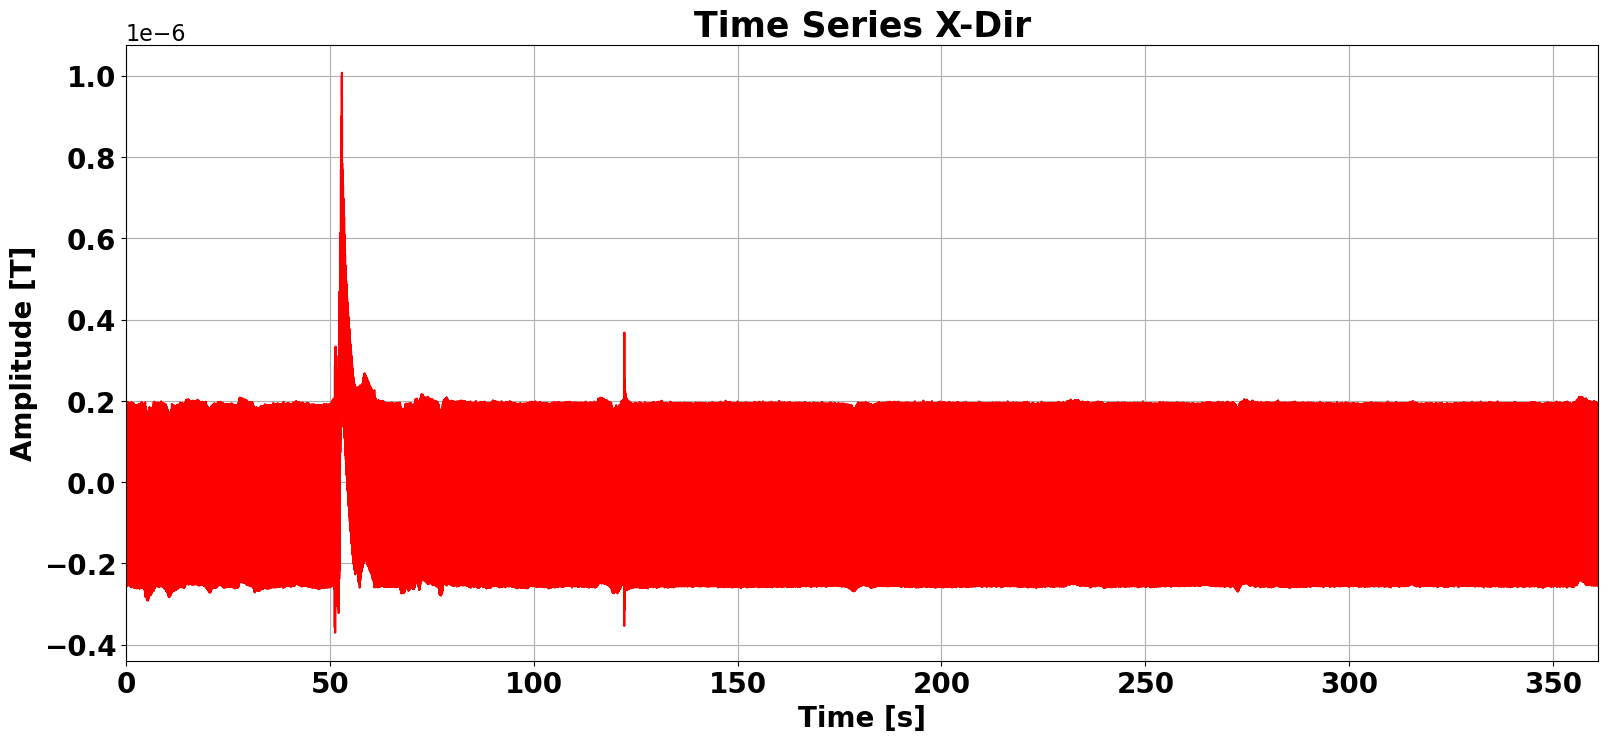

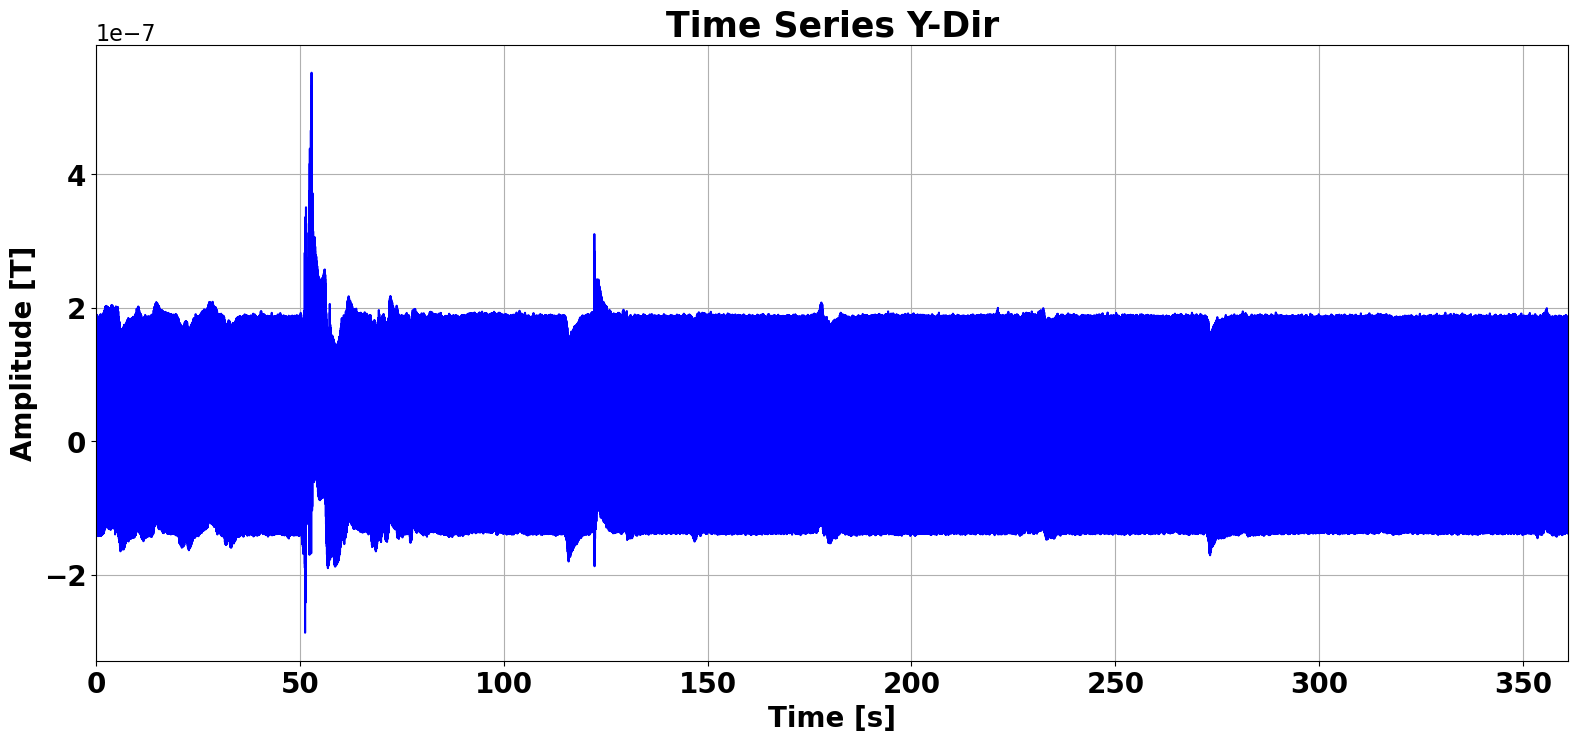

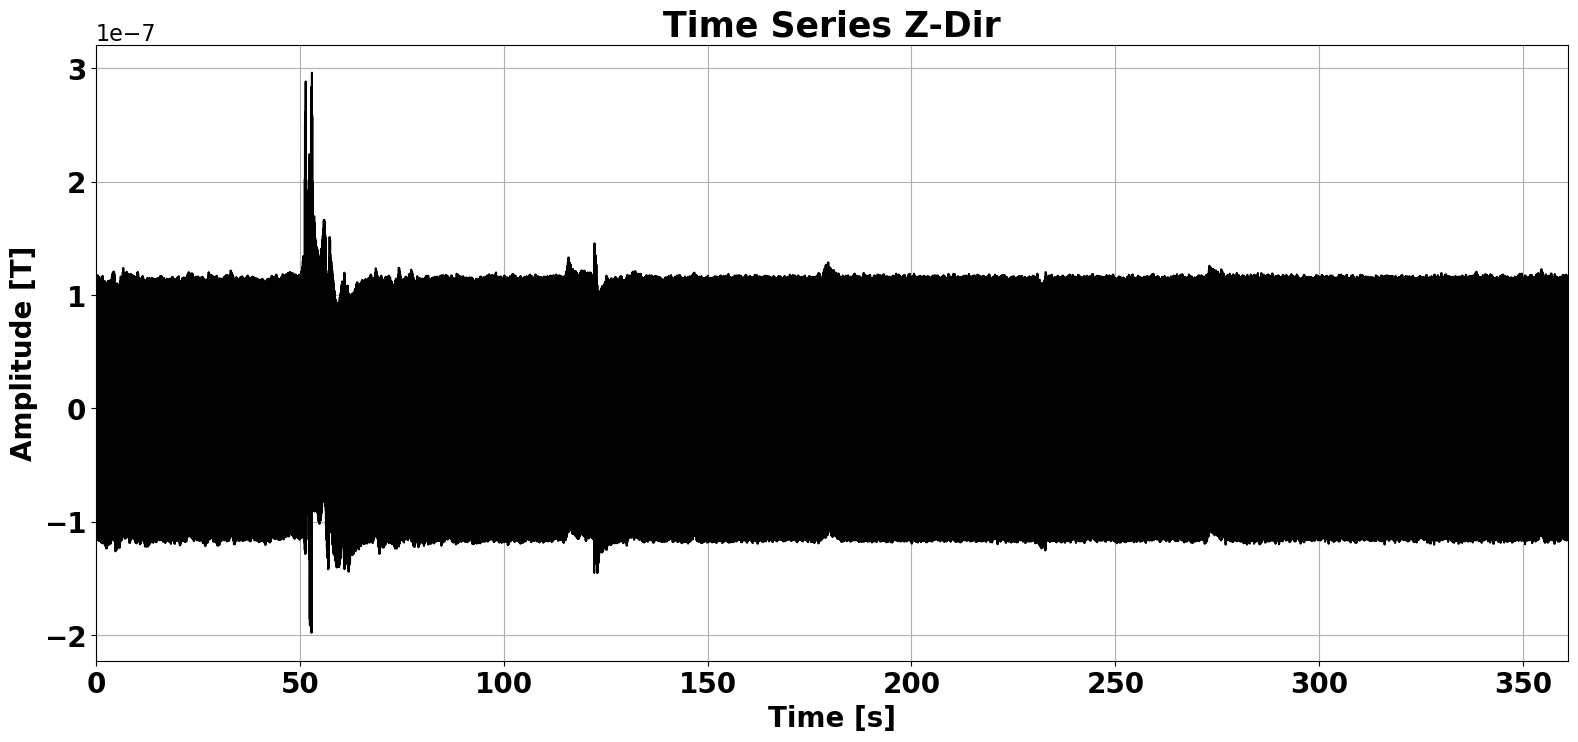

In [6]:
############################################ You can define the y limits #######################################################
##                                                                                                                            ##

ylimmax = None
ylimmin = None

##                                                                                                                            ##
####################### You can change the linestyle/order in which they are ploted for ease of viewing ########################
##                                                                                                                            ##

plt.figure(1, figsize = (19, 8))
ax = plt.gca()
ax.yaxis.get_offset_text().set_fontsize(16)

plt.plot(times,i, label = 'X', color = 'red', linewidth = 1.5)

plt.title("Time Series X-Dir", fontweight = 'bold', fontsize = 25)
plt.xlabel("Time [s]", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude [T]", fontweight = "bold", fontsize = 20)

plt.xlim(0,times[len(times)-1])
plt.ylim(ylimmin,ylimmax)

plt.yticks(fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 20, fontweight = "bold")
plt.grid(True)

##                                                                                                                            ##
################################################################################################################################
##                                                                                                                            ##

plt.figure(2, figsize = (19, 8))
ax = plt.gca()
ax.yaxis.get_offset_text().set_fontsize(16)

plt.plot(times,j, label = 'Y', color = 'blue', linewidth = 1.5)

plt.title("Time Series Y-Dir", fontweight = 'bold', fontsize = 25)
plt.xlabel("Time [s]", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude [T]", fontweight = "bold", fontsize = 20)

plt.xlim(0,times[len(times)-1])
plt.ylim(ylimmin,ylimmax)

plt.yticks(fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 20, fontweight = "bold")
plt.grid(True)

##                                                                                                                            ##
################################################################################################################################
##                                                                                                                            ##

plt.figure(3, figsize = (19, 8))
ax = plt.gca()
ax.yaxis.get_offset_text().set_fontsize(16)

plt.plot(times,k, label = 'Z', color = 'black', linewidth = 1.5)

plt.title("Time Series Z-Dir", fontweight = 'bold', fontsize = 25)
plt.xlabel("Time [s]", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude [T]", fontweight = "bold", fontsize = 20)

plt.xlim(0,times[len(times)-1])
plt.ylim(ylimmin,ylimmax)

plt.yticks(fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 20, fontweight = "bold")
plt.grid(True)

##                                                                                                                            ##
################################################################################################################################
##                                                                                                                            ##

'''
plt.figure(4, figsize = (19, 8))

plt.plot(times,noi, label = 'Noise', color = 'yellow', linewidth = 1.5)

plt.title("Time Series Noise", fontweight = 'bold', fontsize = 25)
plt.xlabel("Time [s]", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude [T]", fontweight = "bold", fontsize = 20)

plt.xlim(0,times[len(times)-1])
#plt.ylim(ylimmin,ylimmax)

plt.yticks(fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 20, fontweight = "bold")
plt.grid(True)
'''

##                                                                                                                            ##
################################################################################################################################


#plt.savefig("place_img_name_here.format", bbox_inches='tight')

## If you want to look at a specific time along the time series, you can use the slider plot below. 

### These variables are used to adjust the how many seconds are displayed and the step length

In [27]:
win = 14  ## sec displayed in the window
stepy = 4  ## how many many sec each step is
buffer = 0.30e-6 ## how much added space on the y axis

## Beware, there may be a slight time delay when slidering

## If the slider is not workering move to the next cell

In [28]:
#------------------------------------------------------------------------------------------------------------------------------#

dirc = input("Please enter which direction you wish to look at: \n")

#------------------------------------------------------------------------------------------------------------------------------#



#---------------------------------------- This function is what makes the slider run ------------------------------------------#
#------------------------------------------- Parameters can be changed as needed ----------------------------------------------#

def plot_with_slider(xlim):
    
    plt.figure(figsize=(19, 8))   ## dpi breaks slider
    ax = plt.gca()
    ax.yaxis.get_offset_text().set_fontsize(16)
    if dirc == "i" or dirc == "x":
        Min = min(i)
        Max = max(i)
        mean = np.mean(i)
        plt.plot(times, i, linewidth = 1.5, label = 'X', color = 'red')
    if dirc == "k" or dirc == "z":
        Min = min(k)
        Max = max(k)
        plt.plot(times, k, linewidth = 1.5, label = 'Z', color = 'black')
    if dirc == "j" or dirc == "y":
        Min = min(j)
        Max = max(j)
        plt.plot(times, j, linewidth = 1.5, label = 'Y', color = 'blue')
    
    plt.xlim(xlim, xlim + win) #---------------------- This is how long the window is (CAN be changed) ------------------------#
    plt.ylim(mean - buffer, mean  + buffer) #-------- This adds a buffer to the window height (CAN be changed) -------------------#
    
    plt.legend(loc = 'upper right', fontsize = 15)
    plt.title("Slider Time Series", fontweight = 'bold', fontsize = 25)
    plt.xlabel("Time [s]", fontweight = "bold", fontsize = 20)
    plt.ylabel("Amplitude [T]", fontweight = "bold", fontsize = 20)
    plt.yticks(fontsize = 20, fontweight = "bold")
    plt.xticks(fontsize = 20, fontweight = "bold")
    plt.grid(True)
    plt.show()

#--------------------------------------- This is where the slider plot gets plotted -------------------------------------------#
#--- min,max = start,end ; step is the increment it slides on ; value is where it starts ; layout is how long the slider is ---#
#---------------------------------------------- step and layout CAN be changed ------------------------------------------------#

if dirc == "i" or dirc == "x" or dirc == "k" or dirc == "z" or dirc == "j" or dirc == "y" or dirc == "North" or dirc == "South" or dirc == "north" or dirc == "south" or dirc == "East" or dirc == "east" or dirc == "west" or dirc == "West":
    interact(plot_with_slider, xlim = FloatSlider(min = 0, max = (times[len(times)-1]), step = stepy, value = 0, 
                                              layout=Layout(width='980px')))
else:
    print("\nInvalid direction")

Please enter which direction you wish to look at: 
i


interactive(children=(FloatSlider(value=0.0, description='xlim', layout=Layout(width='980px'), max=361.099805,…

## If you want to look at spectra of specific parts of the time series, you can set the time limits here

## If not, skip this cell

In [103]:
################################### Enter how long of a time segment you'd like to look at #####################################

start = 0  ## In terms of seconds
end = 125

############################################### This indexes the data frames ###################################################

alpha = int(start * sr)
beta = int(end * sr)

i1 = i[alpha:beta]
j1 = j[alpha:beta]
k1 = k[alpha:beta]

# These are variables to calculate the ASD and plot limits

In [15]:
#------------------------------------------------------ Plot limits -----------------------------------------------------------#

y_max = 10e-8
y_min = 10e-13 

x_max = 2000
x_min = 5e-2

#------------------------------------------------------ fft length ------------------------------------------------------------#
fft_length = 10

#-------------------------------------------------- Precent FFT Overlap -------------------------------------------------------#
overlap = 50 # 50% fft overlap

# This is where the ASD is calculated and plotted

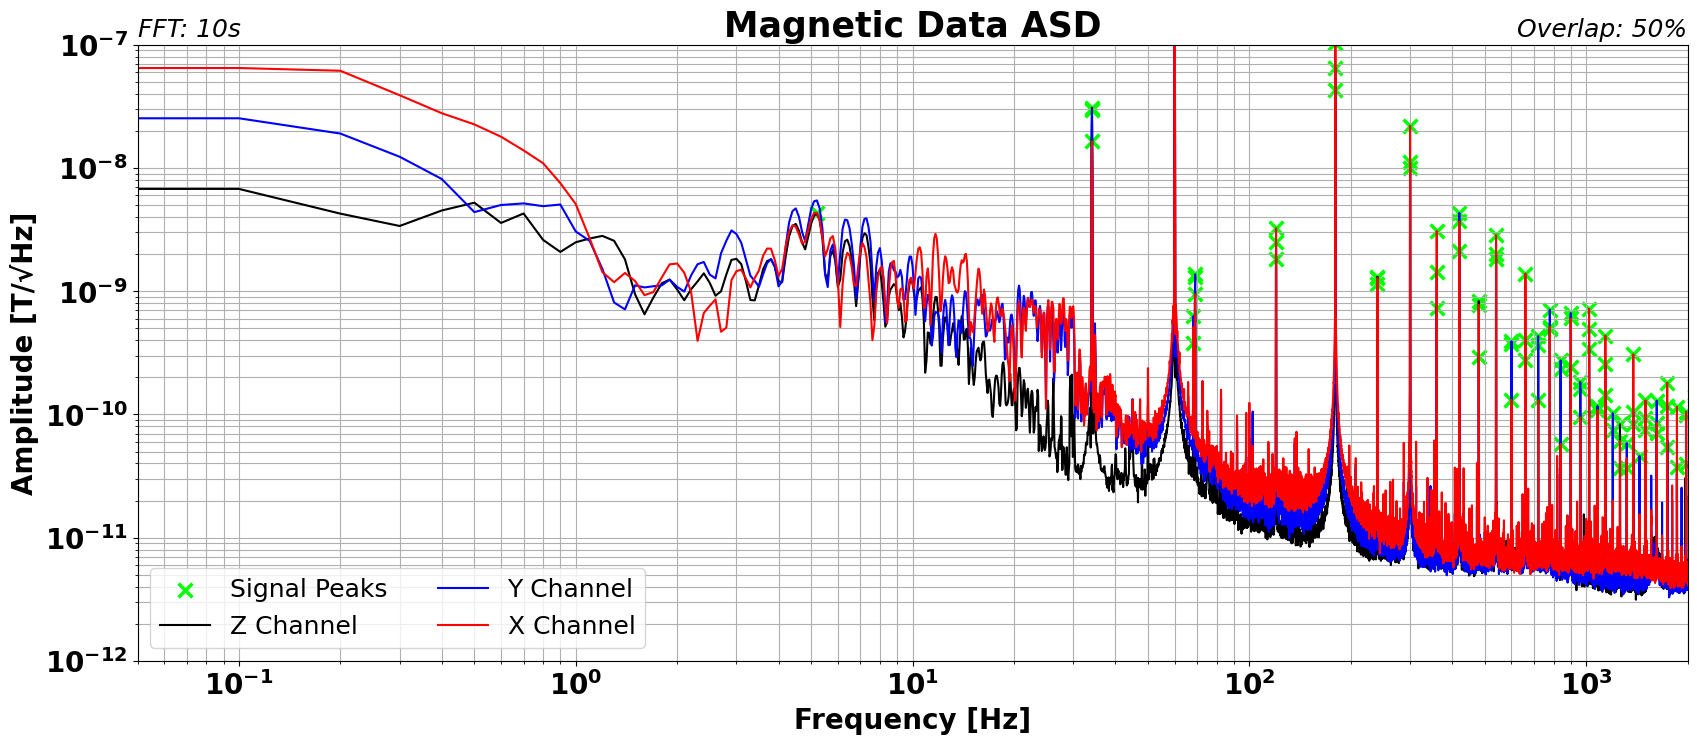

In [16]:
################################################################################################################################


warnings.simplefilter('ignore')

########### If you don't want to look at the whole time series, you can add '1' to the variables, i.e k1, j1, i1 ###############
                                                        #  k1
f_k, f_j, f_i, ak, aj, ai, peaks_k, peaks_j, peaks_i = asd(k, j, i, sr, overlap, fft_length, 2.25)


#------------------------------------------------------------------------------------------------------------------------------#

if os.path.exists(control_data_path):
    
    cf_k, cf_j, cf_i, cak, caj, cai, _, _, _ = asd(ck[0:647487], cj, ci, csr, overlap, fft_length, 4.5)
    
else:
    print("LIGO data not found")
    
#------------------------------------------------------------------------------------------------------------------------------#


##                                                                                                                            ##
##################################################### Plots peaks ##############################################################
##                                                                                                                            ##


plt.figure(figsize = (20, 8)) 


plt.scatter(f_k[peaks_k], ak[peaks_k], s = 100, color = 'lime', marker = 'x', 
            linewidths = 2.5, label = 'Signal Peaks')
plt.scatter(f_j[peaks_j], aj[peaks_j], s = 100, color = 'lime', marker = 'x', 
            linewidths = 2.5)
plt.scatter(f_i[peaks_i], ai[peaks_i], s = 100, color = 'lime', marker = 'x', 
            linewidths = 2.5)


##                                                                                                                            ##
###################################################### PLots data ##############################################################
##                                                                                                                            ##


plt.yscale('log')
plt.xscale('log')

plt.plot(f_k, ak, color = 'black', linewidth = 1.5, label = 'Z Channel')
plt.plot(f_j, aj, color = 'blue', linewidth = 1.5, label = 'Y Channel')
plt.plot(f_i, ai, color = 'red', linewidth = 1.5, label = 'X Channel')

plt.legend(loc = "lower left", fontsize = 18, ncol = 2)

plt.title('FFT: ' + str(fft_length) + "s", fontsize = 18, loc = "left",style ='italic')
plt.title("Overlap: " + str(overlap) + "%", fontsize = 18, loc = "right",style ='italic')

plt.title("Magnetic Data ASD", fontweight = 'bold', fontsize = 25)
plt.xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude [T/√Hz]", fontweight = "bold", fontsize = 20)

plt.yticks(fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 20, fontweight = "bold")

plt.ylim(y_min,y_max)
plt.xlim(x_min,x_max)

plt.grid(True, which="both", ls="-")


#plt.savefig('place_img_name_here.format', bbox_inches='tight')

## The following cell will plot each of direction signal in their own respective plots
## It will also plot data from LIGO Hanford so that you can compare your data to what is generally found at LIGO

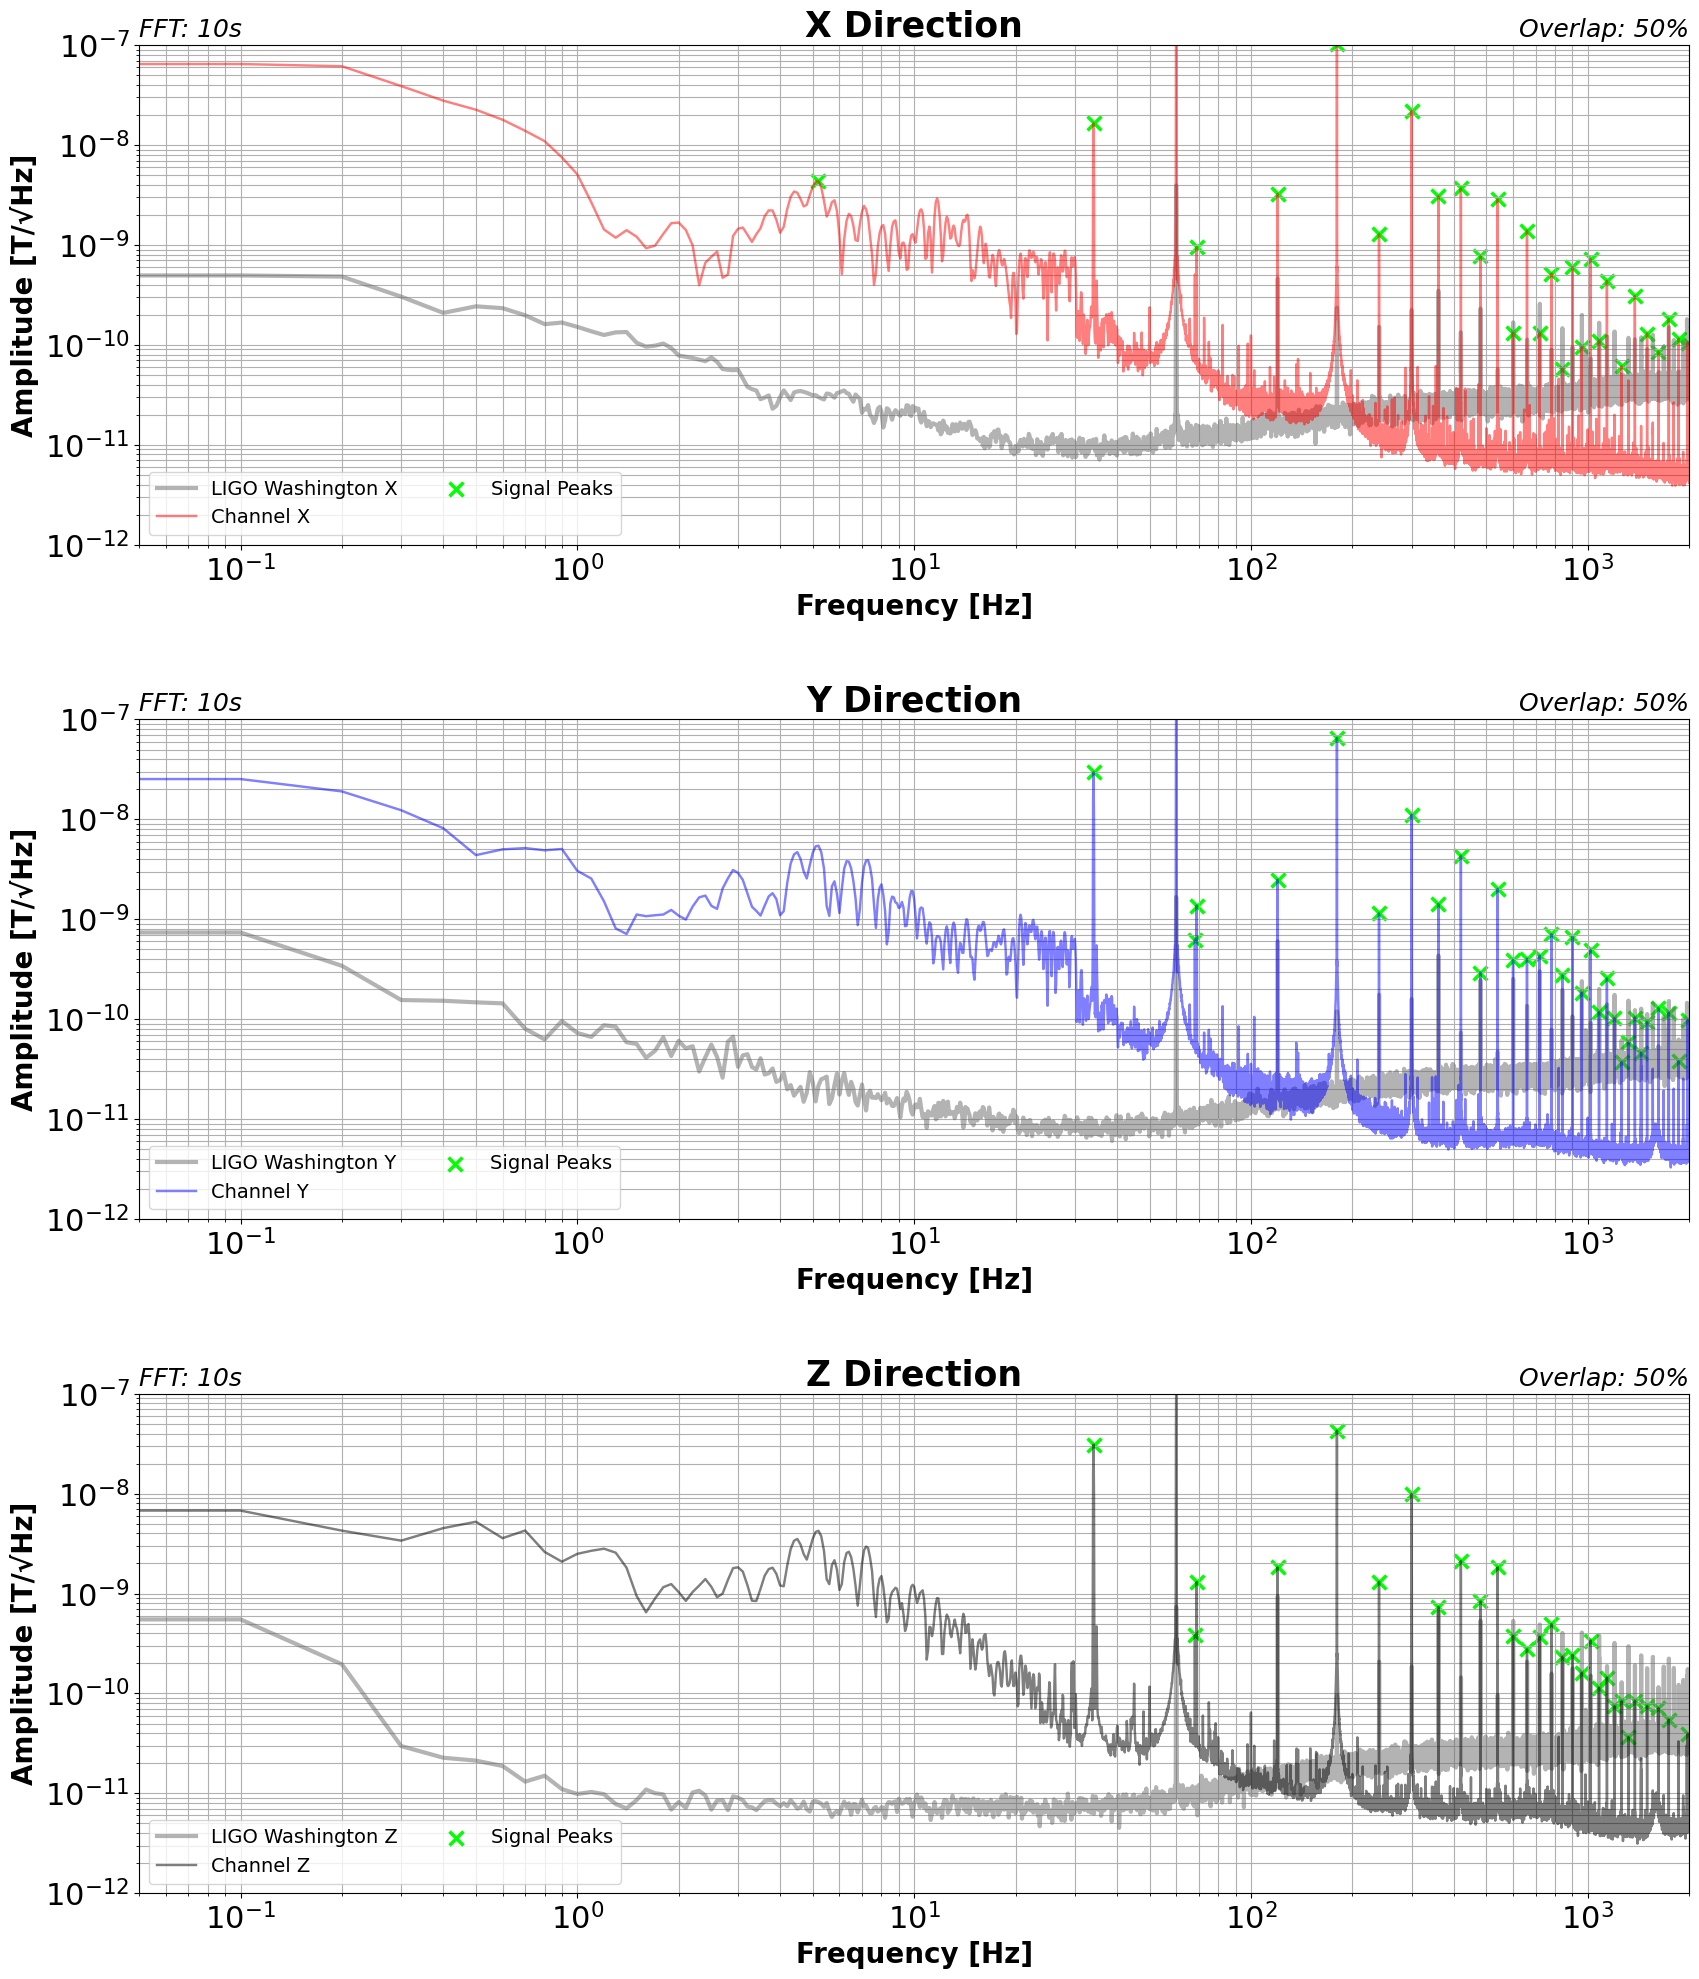

In [17]:
################################################################################################################################
#------------------------------ This gets plotted as a multipanel plot via gridspec and subplot -------------------------------#
################################################################################################################################

fig = plt.figure(figsize = (20,24))
gs = gridspec.GridSpec(3,1, height_ratios = [1,1,1], hspace = 0.35)#, width_ratios = [1,2])


##                                                                                                                            ##
######################################################## Channel X #############################################################
##                                                                                                                            ##


axis1 = fig.add_subplot(gs[0,0])
axis1.set_yscale('log')
axis1.set_xscale('log')
axis1.tick_params(labelsize=22)

#----------------------------------------------------- Plots LIGO Data---------------------------------------------------------#

if os.path.exists(control_data_path):
    axis1.plot(cf_i, cai, linewidth = 3, color = "dimgrey", label = "LIGO Washington X", alpha = 0.5)
else:
    print("LIGO data not found")
    
#------------------------------------------------------------------------------------------------------------------------------#

axis1.plot(f_i, ai, color = 'red', linewidth = 1.75, label = 'Channel X', alpha = 0.5)

axis1.scatter(f_i[peaks_i], ai[peaks_i], s = 100, color = 'lime', marker = 'x', 
            linewidths = 2.5, label = 'Signal Peaks')

axis1.set_title('FFT: ' + str(fft_length) + "s", fontsize = 18, loc = "left",style ='italic')
axis1.set_title("Overlap: " + str(overlap) + "%", fontsize = 18, loc = "right",style ='italic')

axis1.set_title("X Direction", fontweight = "bold", fontsize = 25)
axis1.set_xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 20)
axis1.set_ylabel("Amplitude [T/√Hz]", fontweight = "bold", fontsize = 20)
axis1.legend(loc = "lower left", fontsize = 14, ncol = 2)

axis1.set_ylim(y_min,y_max)
axis1.set_xlim(x_min,x_max)
axis1.grid(True, which="both", ls="-")


##                                                                                                                            ##
######################################################## Channel Y #############################################################
##                                                                                                                            ##


axis2 = fig.add_subplot(gs[1,0])
axis2.set_yscale('log')
axis2.set_xscale('log')
axis2.tick_params(labelsize=22)

#----------------------------------------------------- Plots LIGO Data---------------------------------------------------------#

if os.path.exists(control_data_path):
    axis2.plot(cf_j, caj, linewidth = 3, color = "dimgrey", label = "LIGO Washington Y", alpha = 0.5)

#------------------------------------------------------------------------------------------------------------------------------#

axis2.plot(f_j, aj, color = 'blue', linewidth = 1.75, label = 'Channel Y', alpha = 0.5)

axis2.scatter(f_j[peaks_j], aj[peaks_j], s = 100, color = 'lime', marker = 'x', 
            linewidths = 2.5, label = 'Signal Peaks')

axis2.set_title('FFT: ' + str(fft_length) + "s", fontsize = 18, loc = "left",style ='italic')
axis2.set_title("Overlap: " + str(overlap) + "%", fontsize = 18, loc = "right",style ='italic')

axis2.set_title("Y Direction", fontweight = "bold", fontsize = 25)
axis2.set_xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 20)
axis2.set_ylabel("Amplitude [T/√Hz]", fontweight = "bold", fontsize = 20)
axis2.legend(loc = "lower left", fontsize = 14, ncol = 2)

axis2.set_ylim(y_min,y_max)
axis2.set_xlim(x_min,x_max)
axis2.grid(True, which="both", ls="-")


##                                                                                                                            ##
####################################################### Channel Z ##############################################################
##                                                                                                                            ##


axis3 = fig.add_subplot(gs[2,0])
axis3.set_yscale('log')
axis3.set_xscale('log')
axis3.tick_params(labelsize=22)

#----------------------------------------------------- Plots LIGO Data---------------------------------------------------------#

if os.path.exists(control_data_path):
    axis3.plot(cf_k, cak, linewidth = 3, color = "dimgrey", label = "LIGO Washington Z", alpha = 0.5)

#------------------------------------------------------------------------------------------------------------------------------#

axis3.plot(f_k, ak, color = 'black', linewidth = 1.75, label = 'Channel Z', alpha = 0.5)

axis3.scatter(f_k[peaks_k], ak[peaks_k], s = 100, color = 'lime', marker = 'x', 
            linewidths = 2.5, label = 'Signal Peaks')

axis3.set_title('FFT: ' + str(fft_length) + "s", fontsize = 18, loc = "left",style ='italic')
axis3.set_title("Overlap: " + str(overlap) + "%", fontsize = 18, loc = "right",style ='italic')

axis3.set_title("Z Direction", fontweight = 'bold' , fontsize = 25)
axis3.set_xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 20)
axis3.set_ylabel("Amplitude [T/√Hz]", fontweight = "bold", fontsize = 20)
axis3.legend(loc = "lower left", fontsize = 14, ncol = 2)

axis3.set_ylim(y_min,y_max)
axis3.set_xlim(x_min,x_max)
axis3.grid(True, which="both", ls="-")


#plt.savefig('test.pdf', bbox_inches='tight')

## If you want to look at a specific frequency you can enter it here and compare in the plots below

In [52]:
#------------------------------------------------------------------------------------------------------------------------------#

freq = 60 #Hz

#------------------------------------------------------------------------------------------------------------------------------#

freq_min = freq - 1
freq_max = freq + 1

#------------------------------------------------------------------------------------------------------------------------------#

X direction:
60.01 Hz; Ampl: 5.880e-07

Y direction:
60.01 Hz; Ampl: 4.165e-07

Z direction:
60.01 Hz; Ampl: 2.705e-07



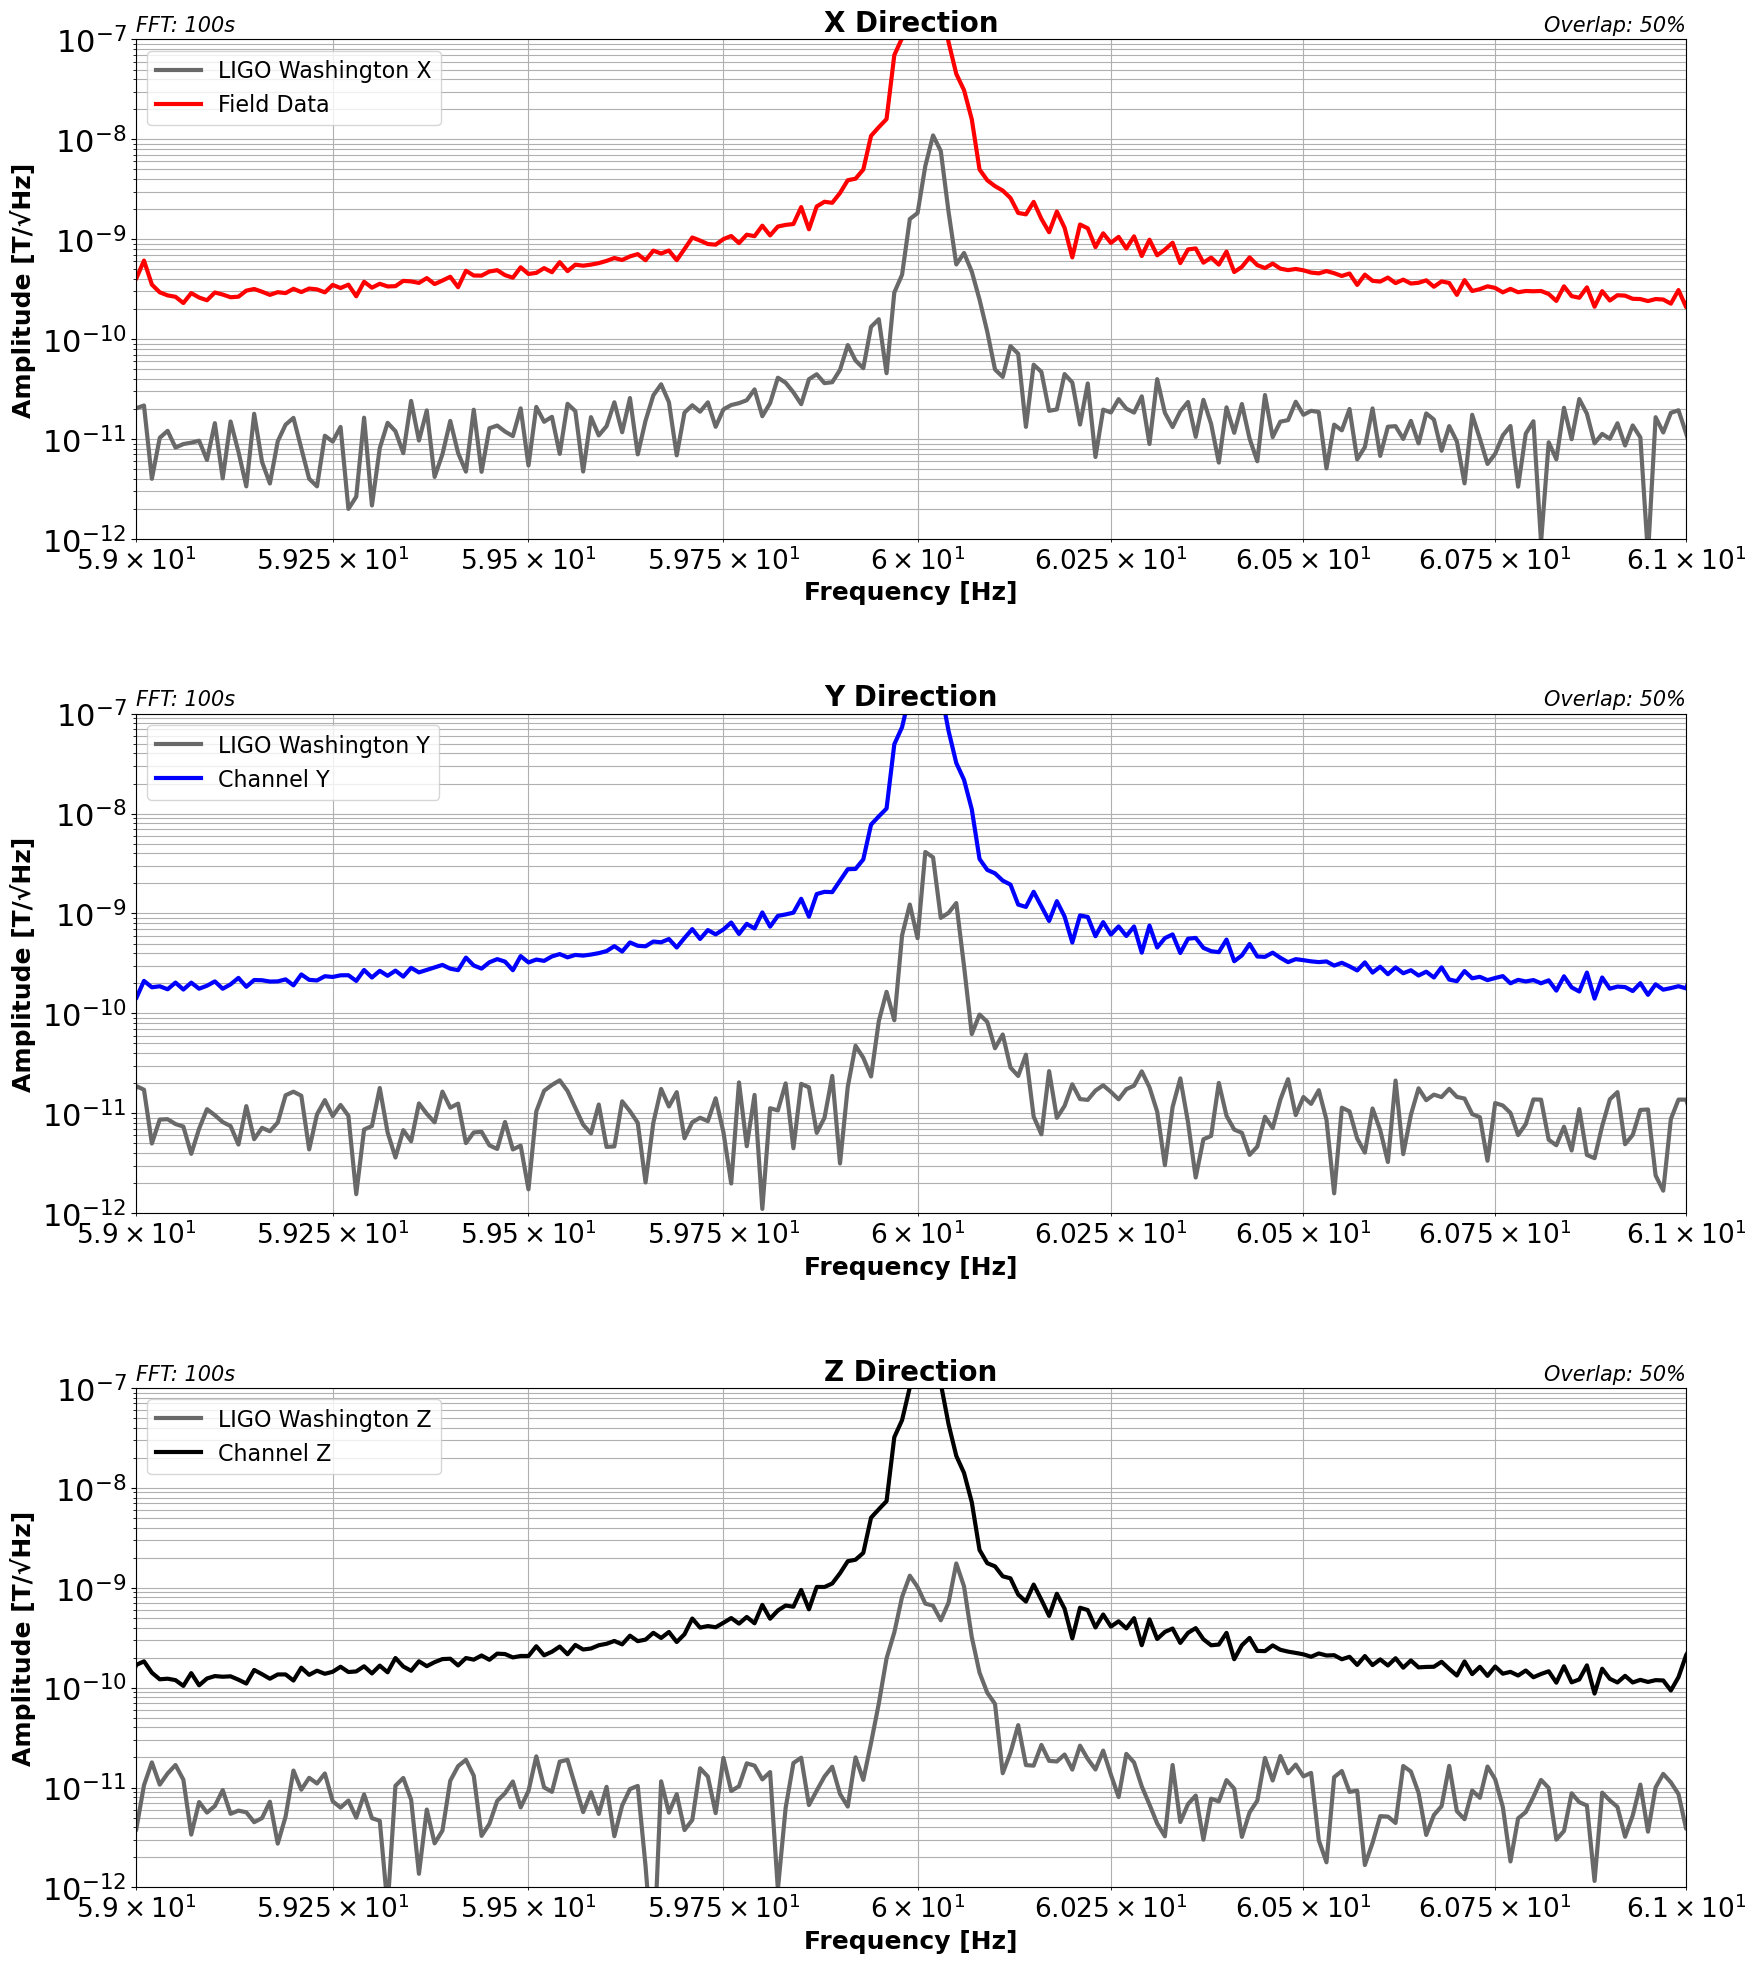

In [55]:
################################################################################################################################
##                                                                                                                            ##


warnings.simplefilter('ignore')

#------------------------------------------------------------------------------------------------------------------------------#


f_k_1, f_j_1, f_i_1, ak_1, aj_1, ai_1, _, _, _ = asd(k, j, i, sr, overlap, 100, None)

l_k_1 = np.log(ak_1)
l_j_1 = np.log(aj_1) 
l_i_1 = np.log(ai_1)


#------------------------------------------------------------------------------------------------------------------------------#


tolerance = 1
mask_i = (f_i_1 >= freq - tolerance) & (f_i_1 <= freq + tolerance)
peaks_local_i, _ = signal.find_peaks(l_i_1[mask_i], prominence = 4.5)

peaks_i_1 = np.where(mask_i)[0][peaks_local_i]

mask_j = (f_j_1 >= freq - tolerance) & (f_j_1 <= freq + tolerance)
peaks_local_j, _ = signal.find_peaks(l_j_1[mask_j], prominence = 4.5)

peaks_j_1 = np.where(mask_j)[0][peaks_local_j]

mask_k = (f_k_1 >= freq - tolerance) & (f_k_1 <= freq + tolerance)
peaks_local_k, _ = signal.find_peaks(l_k_1[mask_k], prominence = 4.5)

peaks_k_1 = np.where(mask_k)[0][peaks_local_k]


#------------------------------------------------------------------------------------------------------------------------------#

if os.path.exists(control_data_path):
    
    cf_k_1, cf_j_1, cf_i_1, cak_1, caj_1, cai_1, _, _, _ = asd(ck[0:647487], cj, ci, csr, overlap, 100, None)
    
else:
    print("LIGO data not found")
    
#------------------------------------------------------------------------------------------------------------------------------#


################################################################################################################################
#------------------------------ This gets plotted as a multipanel plot via gridspec and subplot -------------------------------#
################################################################################################################################


fig = plt.figure(figsize = (20,24))
gs = gridspec.GridSpec(3,1, height_ratios = [1,1,1], hspace = 0.35)
#fig.suptitle("Magnetic Data ASD at " + str(freq) + "Hz", fontweight = 'bold', fontsize = 30, va = "center", y = .93)


##                                                                                                                            ##
########################################################### Channel X ##########################################################
##                                                                                                                            ##
        
    
axis1_1 = fig.add_subplot(gs[0,0])
axis1_1.set_yscale('log')
axis1_1.set_xscale('log')
axis1_1.tick_params(labelsize=22)
plt.tick_params(axis='both', which='minor', labelsize=19)

#----------------------------------------------------- Plots LIGO Data---------------------------------------------------------#

if os.path.exists(control_data_path):
    axis1_1.plot(cf_i_1, cai_1, linewidth = 3, color = "dimgrey", label = "LIGO Washington X")
else:
    print("LIGO data not found")

#------------------------------------------------------------------------------------------------------------------------------#

axis1_1.plot(f_i_1, ai_1, color = 'red', linewidth = 3, label = 'Field Data')

if len(f_i_1[peaks_i_1]) != 0:
    axis1_1.scatter(f_i_1[peaks_i_1][0], ai_1[peaks_i_1][0], linewidth = 3, s = 200, color = 'lime', marker = 'x', 
            linewidths = 2.5)
    print(f"X direction:\n{f_i_1[peaks_i_1][0]:.2f} Hz; Ampl: {ai_1[peaks_i_1][0]:.3e}\n")
else:
    print("No peaks in the X directions\n")

axis1_1.set_title("FFT: 100s", fontsize = 15, loc = "left",style ='italic')
axis1_1.set_title("Overlap: " + str(overlap) + "%", fontsize = 15, loc = "right",style ='italic')

axis1_1.set_title('X Direction', fontsize = 20, loc = 'center', fontweight = "bold")

axis1_1.set_xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 18)
axis1_1.set_ylabel("Amplitude [T/√Hz]", fontweight = "bold", fontsize = 18)
axis1_1.legend(loc = "upper left", fontsize = 16, ncol = 1)

axis1_1.set_ylim(y_min,y_max)
axis1_1.set_xlim(freq_min,freq_max)
axis1_1.grid(True, which="both", ls="-")


##                                                                                                                            ##
########################################################### Channel Y ##########################################################
##                                                                                                                            ##


axis2 = fig.add_subplot(gs[1,0])
axis2.set_yscale('log')
axis2.set_xscale('log')
axis2.tick_params(labelsize=22)
plt.tick_params(axis='both', which='minor', labelsize=19)

#----------------------------------------------------- Plots LIGO Data---------------------------------------------------------#

if os.path.exists(control_data_path):
    axis2.plot(cf_j_1, caj_1, linewidth = 3, color = "dimgrey", label = "LIGO Washington Y")

#------------------------------------------------------------------------------------------------------------------------------#

axis2.plot(f_j_1, aj_1, color = 'blue', linewidth = 3, label = 'Channel Y')

if len(f_j_1[peaks_j_1]) != 0:
    axis2.scatter(f_j_1[peaks_j_1], aj_1[peaks_j_1], linewidth = 3, s = 200, color = 'lime', marker = 'x', 
            linewidths = 2.5)
    print(f"Y direction:\n{f_j_1[peaks_j_1][0]:.2f} Hz; Ampl: {aj_1[peaks_j_1][0]:.3e}\n")
else:
    print("No peaks in the Y directions\n")
    
axis2.set_title("FFT: 100s", fontsize = 15, loc = "left",style ='italic')
axis2.set_title("Overlap: " + str(overlap) + "%", fontsize = 15, loc = "right",style ='italic')

axis2.set_title("Y Direction", fontweight = "bold", fontsize = 20)

axis2.set_xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 18)
axis2.set_ylabel("Amplitude [T/√Hz]", fontweight = "bold", fontsize = 18)
axis2.legend(loc = "upper left", fontsize = 16, ncol = 1)

axis2.set_ylim(y_min,y_max)
axis2.set_xlim(freq_min,freq_max)
axis2.grid(True, which="both", ls="-")


##                                                                                                                            ##
########################################################### Channel Z ##########################################################
##                                                                                                                            ##


axis3 = fig.add_subplot(gs[2,0])
axis3.set_yscale('log')
axis3.set_xscale('log')
axis3.tick_params(labelsize=22)
plt.tick_params(axis='both', which='minor', labelsize=19)

#----------------------------------------------------- Plots LIGO Data---------------------------------------------------------#

if os.path.exists(control_data_path):
    axis3.plot(cf_k_1, cak_1, linewidth = 3, color = "dimgrey", label = "LIGO Washington Z")

#------------------------------------------------------------------------------------------------------------------------------#

axis3.plot(f_k_1, ak_1, color = 'black', linewidth = 3, label = 'Channel Z')

if len(f_k_1[peaks_k_1]) != 0:
    axis3.scatter(f_k_1[peaks_k_1], ak_1[peaks_k_1], linewidth = 5, s = 200, color = 'lime', marker = 'x', 
            linewidths = 2.5,)
    print(f"Z direction:\n{f_k_1[peaks_k_1][0]:.2f} Hz; Ampl: {ak_1[peaks_k_1][0]:.3e}\n")
else:
    print("No peaks in the Z directions\n")
    
axis3.set_title("FFT: 100s", fontsize = 15, loc = "left",style ='italic')
axis3.set_title("Overlap: " + str(overlap) + "%", fontsize = 15, loc = "right",style ='italic')

axis3.set_title("Z Direction", fontweight = 'bold' , fontsize = 20)

axis3.set_xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 18)
axis3.set_ylabel(r"Amplitude [T/√Hz]", fontweight = "bold", fontsize = 18)
axis3.legend(loc = "upper left", fontsize = 16, ncol = 1)

axis3.set_ylim(y_min,y_max)
axis3.set_xlim(freq_min,freq_max)
axis3.grid(True, which="both", ls="-")

##                                                                                                                            ##
################################################################################################################################

#plt.savefig('test.pdf', bbox_inches='tight')

## The following cells are used to plot spectrograms for each direction

### These variables are to set limits for the plot and to compute the spectrogram

In [23]:
#--------------------------------------------------- Colorbar Limits ----------------------------------------------------------#
cmin = 10e-14
cmax = 10e-10

#----------------------------------------------------- Plot limits ------------------------------------------------------------#
ymax = 200 ## In terms of frequency
ymin = 0

#----------------------------------------------------- fft length -------------------------------------------------------------#
fft_len = 10 ## in terms of seconds

#------------------------------------------------- Precent FFT Overlap --------------------------------------------------------#
olap = 50 ## 50% fft overlap

# This is where the spectrograms are plotted

'\naxis4 = fig.add_subplot(gs[3,0])\n\nm2 = axis3.pcolormesh(t, f, np.sqrt(Sxx), shading=\'gouraud\') ############### This will autoscale the plot ###################\n\n#m3 = axis4.pcolormesh(t, f, np.sqrt(Sxx), shading=\'gouraud\', vmin = cmin, vmax = cmax) ### Uncomment this to add inputs ###\n\naxis4.set_title("Electronic Noise", fontweight = \'bold\' , fontsize = 20)\naxis4.set_xlabel(\'Time [s]\', fontweight = \'bold\' , fontsize = 18)\naxis4.set_ylabel(\'Frequency [Hz]\', fontweight = \'bold\' , fontsize = 18)\naxis4.tick_params(labelsize=16)\n\ncbar3 = fig.colorbar(m3, pad = 0.02)\ncbar3.ax.tick_params(labelsize=14)\ncbar3.set_label(label=\'Intensity [m/s/Hz^0.5]\' ,weight=\'bold\', fontsize = 14)\n\n\n#axis4.set_ylim(ymin, ymax) ## Uncomment to set limits\n\n\n'

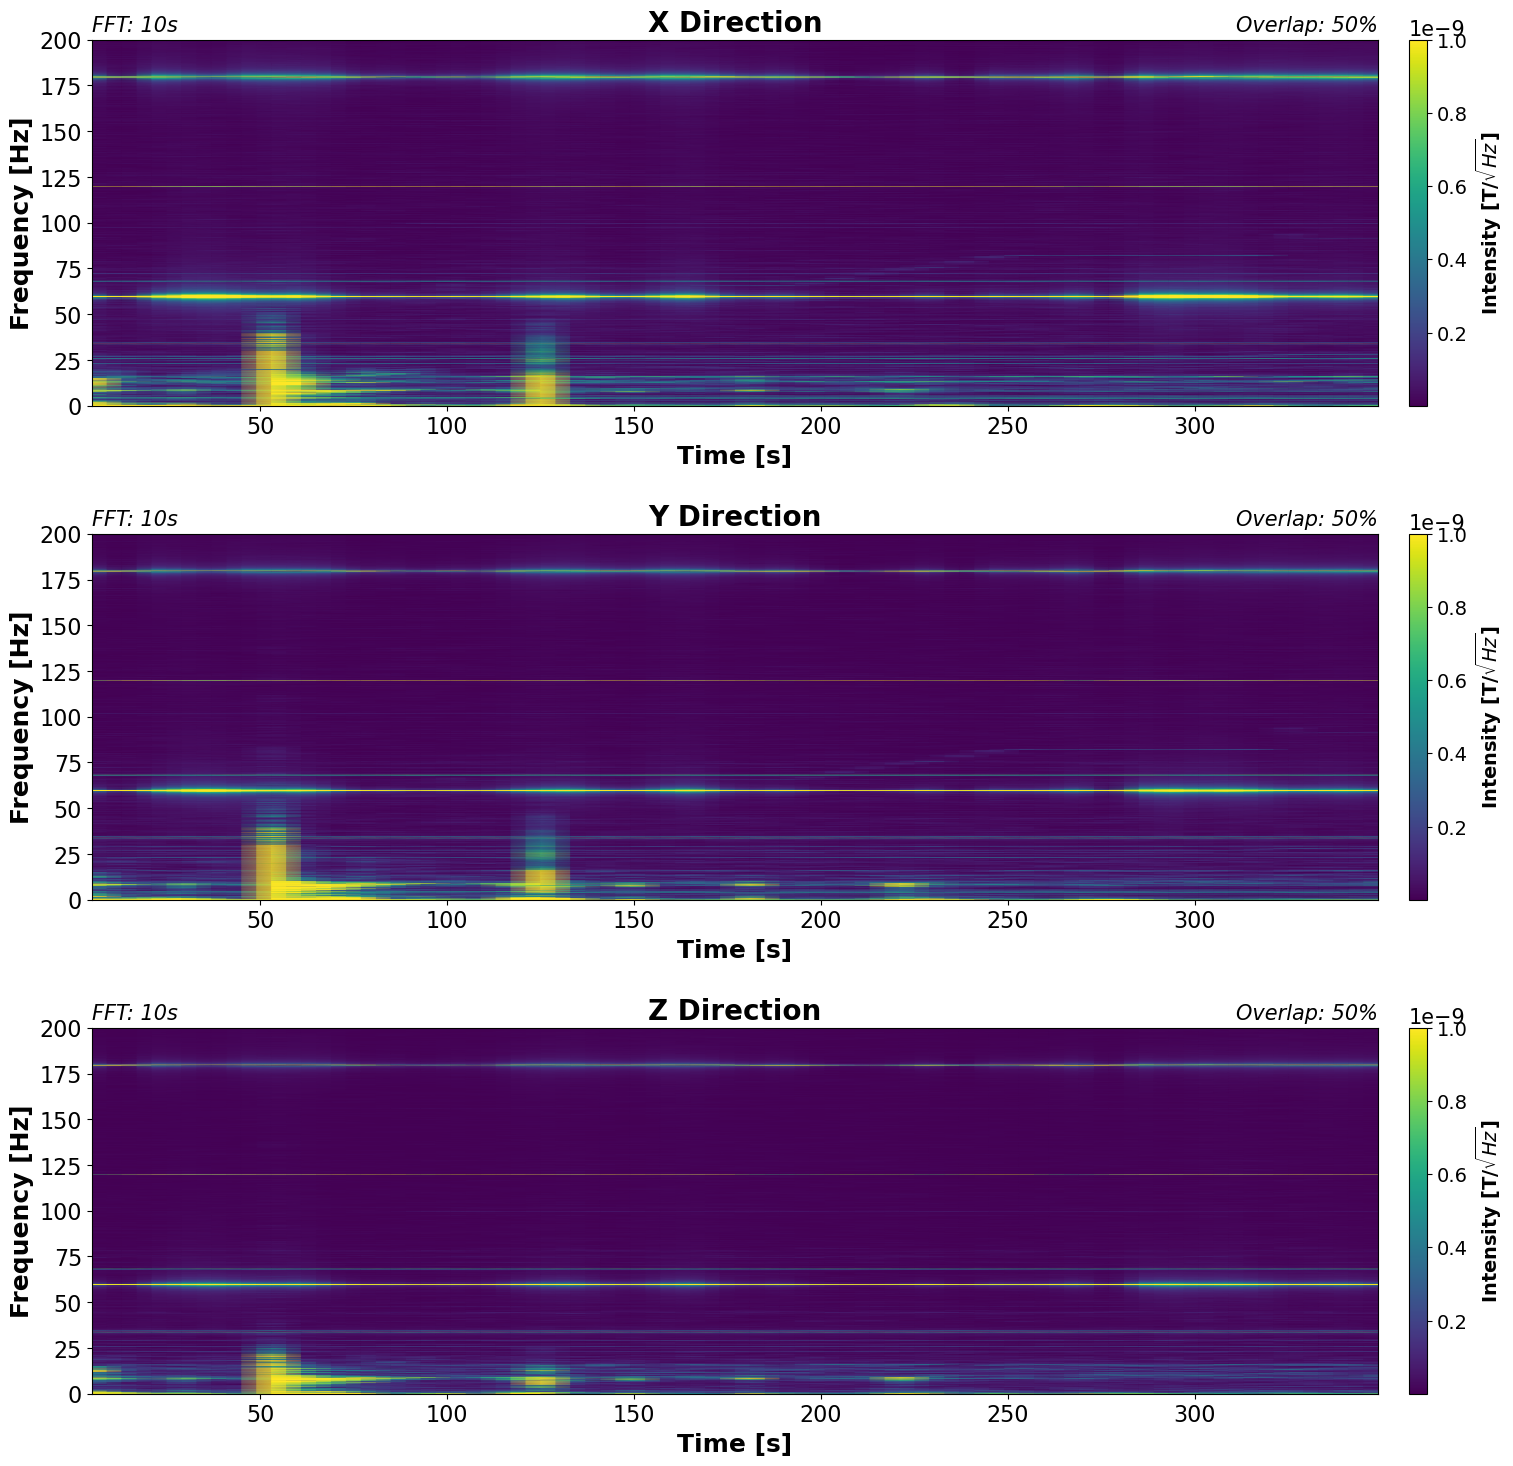

In [24]:
################################################################################################################################
###################### The spectrograms are calculated with signal.spectrogram from SciPy ######################################
################################################################################################################################
warnings.simplefilter('ignore')

fk, tk, Sxxk = signal.spectrogram(k, sr, window= 'hamming', nperseg=round(sr * fft_len), noverlap= round(sr / (olap * 0.01)) )
fj, tj, Sxxj = signal.spectrogram(j, sr, window= 'hamming', nperseg=round(sr * fft_len), noverlap= round(sr / (olap * 0.01)) )
fi, ti, Sxxi = signal.spectrogram(i, sr, window= 'hamming', nperseg=round(sr * fft_len), noverlap= round(sr / (olap * 0.01)) )
#f, t, Sxx = signal.spectrogram(noi, sr, window= 'hamming', nperseg=round(sr * fft_len), noverlap= round(sr / (olap * 0.01)) )


fig = plt.figure(figsize = (20,24))

gs = gridspec.GridSpec(4,1, height_ratios = [1,1,1,1], hspace = 0.35)

####################################################### Channel X ##############################################################

axis1 = fig.add_subplot(gs[0,0])

#m2 = axis1.pcolormesh(ti, fi, np.sqrt(Sxxi), shading='gouraud') #---------------- This will autoscale the plot ----------------#
                                                                #- If you want to change the limits, uncomment the line below -#
                                                                #----------- Be sure to comment out the line above ------------#

m2 = axis1.pcolormesh(ti, fi, np.sqrt(Sxxi), shading='gouraud', vmin = cmin, vmax = cmax) ### Uncomment this to add inputs ###

axis1.set_title('FFT: ' + str(fft_len) + "s", fontsize = 15, loc = "left",style ='italic')
axis1.set_title("Overlap: " + str(olap) + "%", fontsize = 15, loc = "right",style ='italic')

axis1.set_title("X Direction", fontweight = 'bold' , fontsize = 20)
axis1.set_xlabel('Time [s]', fontweight = 'bold' , fontsize = 18)
axis1.set_ylabel('Frequency [Hz]', fontweight = 'bold' , fontsize = 18)
axis1.tick_params(labelsize=16)

cbar2 = fig.colorbar(m2, pad =0.02)
cbar2.ax.tick_params(labelsize=14)
cbar2.set_label(label='Intensity [T/$\sqrt{Hz}$]' ,weight='bold', fontsize = 14)
cbar2.ax.yaxis.offsetText.set_fontsize(15)
cbar2.ax.yaxis.set_offset_position('left')

axis1.set_ylim(ymin, ymax) ## Uncomment to set limits


####################################################### Channel Y ##############################################################

axis2 = fig.add_subplot(gs[1,0])

#m1 = axis2.pcolormesh(tj, fj, np.sqrt(Sxxj), shading='gouraud') #--------------- This will autoscale the plot -----------------#

m1 = axis2.pcolormesh(tj, fj, np.sqrt(Sxxj), shading='gouraud', vmin = cmin, vmax = cmax) ### Uncomment this to add inputs ###

axis2.set_title('FFT: ' + str(fft_len) + "s", fontsize = 15, loc = "left",style ='italic')
axis2.set_title("Overlap: " + str(olap) + "%", fontsize = 15, loc = "right",style ='italic')

axis2.set_title("Y Direction", fontweight = 'bold' , fontsize = 20)
axis2.set_xlabel('Time [s]', fontweight = 'bold' , fontsize = 18)
axis2.set_ylabel('Frequency [Hz]', fontweight = 'bold' , fontsize = 18)
axis2.tick_params(labelsize=16)

cbar1 = fig.colorbar(m1, pad =0.02)
cbar1.ax.tick_params(labelsize=14)
cbar1.set_label(label='Intensity [T/$\sqrt{Hz}$]', weight='bold', fontsize = 14)
cbar1.ax.yaxis.offsetText.set_fontsize(15)
cbar1.ax.yaxis.set_offset_position('left')

axis2.set_ylim(ymin, ymax) ## Uncomment to set limits


####################################################### Channel Z ##############################################################


axis3 = fig.add_subplot(gs[2,0])

#m0 = axis3.pcolormesh(tk, fk, np.sqrt(Sxxk), shading='gouraud') #--------------- This will autoscale the plot -----------------#

m0 = axis3.pcolormesh(tk, fk, np.sqrt(Sxxk), shading='gouraud', vmin = cmin, vmax = cmax) ### Uncomment this to add inputs ###

axis3.set_title('FFT: ' + str(fft_len) + "s", fontsize = 15, loc = "left",style ='italic')
axis3.set_title("Overlap: " + str(olap) + "%", fontsize = 15, loc = "right",style ='italic')

axis3.set_title("Z Direction", fontweight = 'bold' , fontsize = 20)
axis3.set_xlabel('Time [s]', fontweight = 'bold' , fontsize = 18)
axis3.set_ylabel('Frequency [Hz]', fontweight = 'bold' , fontsize = 18)
axis3.tick_params(labelsize=16)

cbar0 = fig.colorbar(m0, label='Intensity [m/s/Hz^0.5]', pad =0.02)
cbar0.ax.tick_params(labelsize=14)
cbar0.set_label(label='Intensity [T/$\sqrt{Hz}$]' ,weight='bold', fontsize = 14)
cbar0.ax.yaxis.offsetText.set_fontsize(15)
cbar0.ax.yaxis.set_offset_position('left')

axis3.set_ylim(ymin, ymax) ## Uncomment to set limits


###################################################### Noise Channel ###########################################################
'''
axis4 = fig.add_subplot(gs[3,0])

m2 = axis3.pcolormesh(t, f, np.sqrt(Sxx), shading='gouraud') ############### This will autoscale the plot ###################

#m3 = axis4.pcolormesh(t, f, np.sqrt(Sxx), shading='gouraud', vmin = cmin, vmax = cmax) ### Uncomment this to add inputs ###

axis4.set_title("Electronic Noise", fontweight = 'bold' , fontsize = 20)
axis4.set_xlabel('Time [s]', fontweight = 'bold' , fontsize = 18)
axis4.set_ylabel('Frequency [Hz]', fontweight = 'bold' , fontsize = 18)
axis4.tick_params(labelsize=16)

cbar3 = fig.colorbar(m3, pad = 0.02)
cbar3.ax.tick_params(labelsize=14)
cbar3.set_label(label='Intensity [m/s/Hz^0.5]' ,weight='bold', fontsize = 14)


#axis4.set_ylim(ymin, ymax) ## Uncomment to set limits


'''

#plt.savefig('**place_img_name_here.format**', bbox_inches='tight')

################################################################################################################################
#################################### These may take a while to plot, since they are so dense ###################################

# This cell will output all the frequencies found and their respective amplitudes into a csv file

In [10]:
####################################################### # # # # # # ############################################################
################################################### # SPAGHETTI CODE # #########################################################
###################################################### # # # # # # # ###########################################################
################################################################################################################################
###################################### Since each direction has a different number of peaks ####################################
############################################### They cannot be printed out right ###############################################
########################################### So they have to be made the same length ############################################
################################################################################################################################

c = 0    ## Variables for loops
g = 0
h = 0
p = 0

lst = [] ## Empty sets to be appended to 
tally = []
docket = []

badwolf = max(len(f_i[peaks_i]), len(f_j[peaks_j]), len(f_k[peaks_k])) # Finds the directions with the most peaks, i.e longest #

for g in range(0, badwolf - len(f_i[peaks_i])): #------------ The shorter data sets will be made equal with 'Nan' -------------#
    lst.append(np.nan)                          #------------------- Nothing will happen to the longest set -------------------#
for h in range(0, badwolf - len(f_j[peaks_j])): #---------------- If they are the same length nothing happens -----------------#
    tally.append(np.nan)
for p in range(0, badwolf - len(f_k[peaks_k])):
    docket.append(np.nan)

################################################################################################################################
#---------------------------------------- This path is where the file gets outputted ------------------------------------------#
#-----------------------------------------------------# Change as need #-------------------------------------------------------#
################################################################################################################################


with open (r"frequencies.csv",'w') as f: 
        f.write('Frequency_X [Hz],Amplitude_X [T/√Hz],Frequency_Y [Hz],Amplitude_Y [T/√Hz],Frequency_Z [Hz],Amplitude_Z [T/√Hz]\n') 


################################################################################################################################
        
        for c in range(0, badwolf):
            if (len(f_i[peaks_i])!=len(f_j[peaks_j]) or len(f_i[peaks_i])!=len(f_k[peaks_k]) or len(f_j[peaks_j])!=len(f_k[peaks_k])):
                if len(f_i[peaks_i]) == badwolf:
                    
#-------------------------------------------- The files are made the same length ----------------------------------------------#
                    
                    dir1 = np.append(f_j[peaks_j], tally)
                    dir_1 = np.append(aj[peaks_j], tally)
                    dir2 = np.append(f_k[peaks_k], docket)
                    dir_2 = np.append(ak[peaks_k], docket)

#------------------------------------ This where the dat points get printed in the file ---------------------------------------#
                   
                    f.write(str(f_i[peaks_i][c]) + ',' + str(ai[peaks_i][c]) + ',' +    
                            str(dir1[c]) + ',' + str(dir_1[c]) + ',' +
                            str(dir2[c]) + ',' + str(dir_2[c]) + '\n')

#--------------------- The elif's are for if a different direction has more peaks, longest data set ---------------------------#

                elif len(f_j[peaks_j]) == badwolf:
                    
                    dir1 = np.append(f_i[peaks_i], lst)
                    dir_1 = np.append(ai[peaks_i], lst)
                    dir2 = np.append(f_k[peaks_k], docket)
                    dir_2 = np.append(ak[peaks_k], docket)
                    
                    f.write(str(dir1[c]) + ',' + str(dir_1[c]) + ',' +    
                            str(f_j[peaks_j][c]) + ',' + str(aj[peaks_j][c]) + ',' +
                            str(dir2[c]) + ',' + str(dir_2[c]) + '\n')
                    
                elif len(f_k[peaks_k]) == badwolf:
                    
                    dir1 = np.append(f_i[peaks_i], lst)
                    dir_1 = np.append(ai[peaks_i], lst)
                    dir2 = np.append(f_j[peaks_j], tally)
                    dir_2 = np.append(aj[peaks_j], tally)
                    
                    
                    f.write(str(dir1[c]) + ',' + str(dir_1[c]) + ',' +    
                            str(dir2[c]) + ',' + str(dir_2[c]) + ',' +
                            str(f_k[peaks_k][c]) + ',' + str(ak[peaks_k][c]) + '\n')
                    
#------------------------------ If the data sets are the same length the data will be printed here ----------------------------#
            
            else:
                f.write(str(f_i[peaks_i][c]) + ',' + str(ai[peaks_i][c]) + ',' +    
                        str(f_j[peaks_j][c]) + ',' + str(aj[peaks_j][c]) + ',' +
                        str(f_k[peaks_k][c]) + ',' + str(ak[peaks_k][c]) + '\n')
print('It ran (づ｡◕‿‿◕｡)づ')
print('A file titled frequencies.csv has been saved to the same directory as this file.')

It ran
